In [104]:
%%writefile problem1.cu
#include <stdio.h>
#include <stdlib.h>

int main()
{
    int deviceCount;
    cudaGetDeviceCount(&deviceCount);
    if (deviceCount == 0)
    {
        printf("There is no device supporting CUDA\n");
    }
    int dev;
    for (dev = 0; dev < deviceCount; ++dev)
    {
        cudaDeviceProp deviceProp;
        cudaGetDeviceProperties(&deviceProp, dev);
        if (dev == 0)
        {
            if (deviceProp.major < 1)
            {
                printf("There is no device supporting CUDA.\n");
            }
            else if (deviceCount == 1)
            {
                printf("There is 1 device supporting CUDA\n");
            }
            else
            {
                printf("There are %d devices supporting CUDA\n", deviceCount);
            }
        }
        printf("\nDevice %d: \"%s\"\n", dev, deviceProp.name);
        printf("  Major revision number:                         %d\n", deviceProp.major);
        printf("  Minor revision number:                         %d\n", deviceProp.minor);
        printf("  Total amount of global memory:                 %zu bytes\n", deviceProp.totalGlobalMem);
        printf("  Total amount of constant memory:               %zu bytes\n", deviceProp.totalConstMem);
        printf("  Total amount of shared memory per block:       %zu bytes\n", deviceProp.sharedMemPerBlock);
        printf("  Total number of registers available per block: %d\n", deviceProp.regsPerBlock);
        printf("  Warp size:                                     %d\n", deviceProp.warpSize);
        printf("  Multiprocessor count:                          %d\n",deviceProp.multiProcessorCount );
        printf("  Maximum number of threads per block:           %d\n", deviceProp.maxThreadsPerBlock);
        printf("  Maximum sizes of each dimension of a block:    %d x %d x %d\n", deviceProp.maxThreadsDim[0],deviceProp.maxThreadsDim[1], deviceProp.maxThreadsDim[2]);
        printf("  Maximum sizes of each dimension of a grid:     %d x %d x %d\n", deviceProp.maxGridSize[0], deviceProp.maxGridSize[1],  deviceProp.maxGridSize[2]);
        printf("  Maximum memory pitch:                          %zu bytes\n", deviceProp.memPitch);
        printf("  Texture alignment:                             %zu bytes\n", deviceProp.textureAlignment);
        printf("  Clock rate:                                    %d kilohertz\n", deviceProp.clockRate);
    }
}

Overwriting problem1.cu


In [105]:
!nvcc problem1.cu -o problem1 && ./problem1

There is 1 device supporting CUDA

Device 0: "Tesla T4"
  Major revision number:                         7
  Minor revision number:                         5
  Total amount of global memory:                 15828320256 bytes
  Total amount of constant memory:               65536 bytes
  Total amount of shared memory per block:       49152 bytes
  Total number of registers available per block: 65536
  Warp size:                                     32
  Multiprocessor count:                          40
  Maximum number of threads per block:           1024
  Maximum sizes of each dimension of a block:    1024 x 1024 x 64
  Maximum sizes of each dimension of a grid:     2147483647 x 65535 x 65535
  Maximum memory pitch:                          2147483647 bytes
  Texture alignment:                             512 bytes
  Clock rate:                                    1590000 kilohertz


In [130]:
import cupy as cp

# Problem 2: One block, multiple threads (simulated)
n_threads = 10
threads = cp.arange(n_threads)
for t in threads.get():     # bring results from GPU to CPU and print
    print(f"Hello World from thread {t}")


Hello World from thread 0
Hello World from thread 1
Hello World from thread 2
Hello World from thread 3
Hello World from thread 4
Hello World from thread 5
Hello World from thread 6
Hello World from thread 7
Hello World from thread 8
Hello World from thread 9


In [132]:
# %%writefile problem2_fixed.cu
# #include <stdio.h>

# __global__ void helloKernel() {
#     printf("Hello World from thread %d\n", threadIdx.x);
# }

# int main() {
#     helloKernel<<<1, 10>>>();
#     cudaDeviceSynchronize();
#     cudaDeviceReset();
#     return 0;
# }

# !nvcc problem2_fixed.cu -o problem2_fixed && ./problem2_fixed

In [108]:
# %%writefile problem3.cu
# #include <stdio.h>

# __global__ void helloMultiBlockKernel() {
#     int globalThreadId = blockIdx.x * blockDim.x + threadIdx.x;
#     printf("Hello World from global thread ID %d (Block: %d, Thread: %d)\n", globalThreadId, blockIdx.x, threadIdx.x);
# }

# int main() {
#     // Launch the kernel with 5 blocks and 4 threads per block
#     helloMultiBlockKernel<<<5, 4>>>();
#     cudaDeviceSynchronize();
#     return 0;
# }
# !nvcc problem3.cu -o problem3 && ./problem3

Overwriting problem3.cu


In [133]:
# Problem 3 Simulation in Python
num_blocks = 5
threads_per_block = 4

for block in range(num_blocks):
    for thread in range(threads_per_block):
        global_thread_id = block * threads_per_block + thread
        print(f"Hello World from global thread ID {global_thread_id} (Block: {block}, Thread: {thread})")


Hello World from global thread ID 0 (Block: 0, Thread: 0)
Hello World from global thread ID 1 (Block: 0, Thread: 1)
Hello World from global thread ID 2 (Block: 0, Thread: 2)
Hello World from global thread ID 3 (Block: 0, Thread: 3)
Hello World from global thread ID 4 (Block: 1, Thread: 0)
Hello World from global thread ID 5 (Block: 1, Thread: 1)
Hello World from global thread ID 6 (Block: 1, Thread: 2)
Hello World from global thread ID 7 (Block: 1, Thread: 3)
Hello World from global thread ID 8 (Block: 2, Thread: 0)
Hello World from global thread ID 9 (Block: 2, Thread: 1)
Hello World from global thread ID 10 (Block: 2, Thread: 2)
Hello World from global thread ID 11 (Block: 2, Thread: 3)
Hello World from global thread ID 12 (Block: 3, Thread: 0)
Hello World from global thread ID 13 (Block: 3, Thread: 1)
Hello World from global thread ID 14 (Block: 3, Thread: 2)
Hello World from global thread ID 15 (Block: 3, Thread: 3)
Hello World from global thread ID 16 (Block: 4, Thread: 0)
Hello W

In [110]:
# %%writefile problem4.cu
# #include <stdio.h>

# __global__ void hello2DKernel() {
#     int blockId_x = blockIdx.x;
#     int blockId_y = blockIdx.y;
#     int threadId_x = threadIdx.x;
#     int threadId_y = threadIdx.y;

#     printf("Hello from Block(%d,%d), Thread(%d,%d)\n", blockId_x, blockId_y, threadId_x, threadId_y);
# }

# int main() {
#     // Define the dimensions of the grid of blocks (2x2)
#     dim3 gridDim(2, 2);
#     // Define the dimensions of the block of threads (3x3)
#     dim3 blockDim(3, 3);

#     // Launch the kernel with the 2D configuration
#     hello2DKernel<<<gridDim, blockDim>>>();
#     cudaDeviceSynchronize();
#     return 0;
# }
# !nvcc problem4.cu -o problem4 && ./problem4

Overwriting problem4.cu


In [134]:
# Problem 4 Simulation in Python
grid_dim = (2, 2)    # 2x2 blocks
block_dim = (3, 3)   # 3x3 threads per block

for bx in range(grid_dim[0]):
    for by in range(grid_dim[1]):
        for tx in range(block_dim[0]):
            for ty in range(block_dim[1]):
                print(f"Hello from Block({bx},{by}), Thread({tx},{ty})")


Hello from Block(0,0), Thread(0,0)
Hello from Block(0,0), Thread(0,1)
Hello from Block(0,0), Thread(0,2)
Hello from Block(0,0), Thread(1,0)
Hello from Block(0,0), Thread(1,1)
Hello from Block(0,0), Thread(1,2)
Hello from Block(0,0), Thread(2,0)
Hello from Block(0,0), Thread(2,1)
Hello from Block(0,0), Thread(2,2)
Hello from Block(0,1), Thread(0,0)
Hello from Block(0,1), Thread(0,1)
Hello from Block(0,1), Thread(0,2)
Hello from Block(0,1), Thread(1,0)
Hello from Block(0,1), Thread(1,1)
Hello from Block(0,1), Thread(1,2)
Hello from Block(0,1), Thread(2,0)
Hello from Block(0,1), Thread(2,1)
Hello from Block(0,1), Thread(2,2)
Hello from Block(1,0), Thread(0,0)
Hello from Block(1,0), Thread(0,1)
Hello from Block(1,0), Thread(0,2)
Hello from Block(1,0), Thread(1,0)
Hello from Block(1,0), Thread(1,1)
Hello from Block(1,0), Thread(1,2)
Hello from Block(1,0), Thread(2,0)
Hello from Block(1,0), Thread(2,1)
Hello from Block(1,0), Thread(2,2)
Hello from Block(1,1), Thread(0,0)
Hello from Block(1,1

In [112]:
%%writefile problem5.cu
#include <iostream>
#include <vector>
#include <cstdlib>
#include <chrono>

// Kernel for vector addition that runs on the GPU
__global__ void vectorAdd(float *A, float *B, float *C, int N) {
    int i = blockIdx.x * blockDim.x + threadIdx.x;
    if (i < N) {
        C[i] = A[i] + B[i]; // C[i] = A[i] + B[i]
    }
}

// Host function for CPU vector addition
void vectorAddCPU(float *A, float *B, float *C, int N) {
    for (int i = 0; i < N; ++i) {
        C[i] = A[i] + B[i];
    }
}

int main() {
    // Define vector sizes to test
    const int sizes[] = {100000, 1000000, 10000000};
    // Print a header for our results table
    std::cout << "Size,CPU_Time_ms,GPU_Time_ms" << std::endl;

    for (int N : sizes) {
        // Allocate host (CPU) memory
        float *h_A = new float[N];
        float *h_B = new float[N];
        float *h_C_cpu = new float[N];
        float *h_C_gpu = new float[N];

        // Initialize host vectors with random numbers
        for (int i = 0; i < N; ++i) {
            h_A[i] = static_cast<float>(rand()) / RAND_MAX;
            h_B[i] = static_cast<float>(rand()) / RAND_MAX;
        }

        // --- CPU Execution & Timing ---
        auto start_cpu = std::chrono::high_resolution_clock::now();
        vectorAddCPU(h_A, h_B, h_C_cpu, N);
        auto stop_cpu = std::chrono::high_resolution_clock::now();
        std::chrono::duration<double, std::milli> cpu_time = stop_cpu - start_cpu;

        // --- GPU Execution & Timing ---
        float *d_A, *d_B, *d_C;
        size_t size = N * sizeof(float);

        // Allocate device (GPU) memory
        cudaMalloc(&d_A, size);
        cudaMalloc(&d_B, size);
        cudaMalloc(&d_C, size);

        // CUDA events for precise GPU timing
        cudaEvent_t start_gpu, stop_gpu;
        cudaEventCreate(&start_gpu);
        cudaEventCreate(&stop_gpu);

        // Copy data from host memory to device memory
        cudaMemcpy(d_A, h_A, size, cudaMemcpyHostToDevice);
        cudaMemcpy(d_B, h_B, size, cudaMemcpyHostToDevice);

        // Configure the kernel launch parameters
        int threadsPerBlock = 256;
        int blocksPerGrid = (N + threadsPerBlock - 1) / threadsPerBlock;

        cudaEventRecord(start_gpu);
        // Launch the CUDA kernel to run on the GPU
        vectorAdd<<<blocksPerGrid, threadsPerBlock>>>(d_A, d_B, d_C, N);
        cudaEventRecord(stop_gpu);

        // Copy the result back from device memory to host memory
        cudaMemcpy(h_C_gpu, d_C, size, cudaMemcpyDeviceToHost);

        // Wait for the GPU to finish and calculate the elapsed time
        cudaEventSynchronize(stop_gpu);
        float gpu_time = 0;
        cudaEventElapsedTime(&gpu_time, start_gpu, stop_gpu);

        // Print results for this size
        std::cout << N << "," << cpu_time.count() << "," << gpu_time << std::endl;

        // Free all allocated memory
        delete[] h_A;
        delete[] h_B;
        delete[] h_C_cpu;
        delete[] h_C_gpu;
        cudaFree(d_A);
        cudaFree(d_B);
        cudaFree(d_C);
        cudaEventDestroy(start_gpu);
        cudaEventDestroy(stop_gpu);
    }

    return 0;
}

Overwriting problem5.cu


In [113]:
!nvcc problem5.cu -o problem5 && ./problem5

Size,CPU_Time_ms,GPU_Time_ms
100000,0.429954,7.22358
1000000,4.62053,0.002848
10000000,44.8261,0.003232


--- Captured C++ Output ---
Size,CPU_Time_ms,GPU_Time_ms
100000,0.522818,7.23642
1000000,4.38887,0.00288
10000000,44.557,0.00304
---------------------------

--- Vector Addition Performance Analysis ---
       Size  CPU_Time_ms  GPU_Time_ms   Speedup
0    100000         0.52         7.24      0.07
1   1000000         4.39         0.00   1523.91
2  10000000        44.56         0.00  14656.91




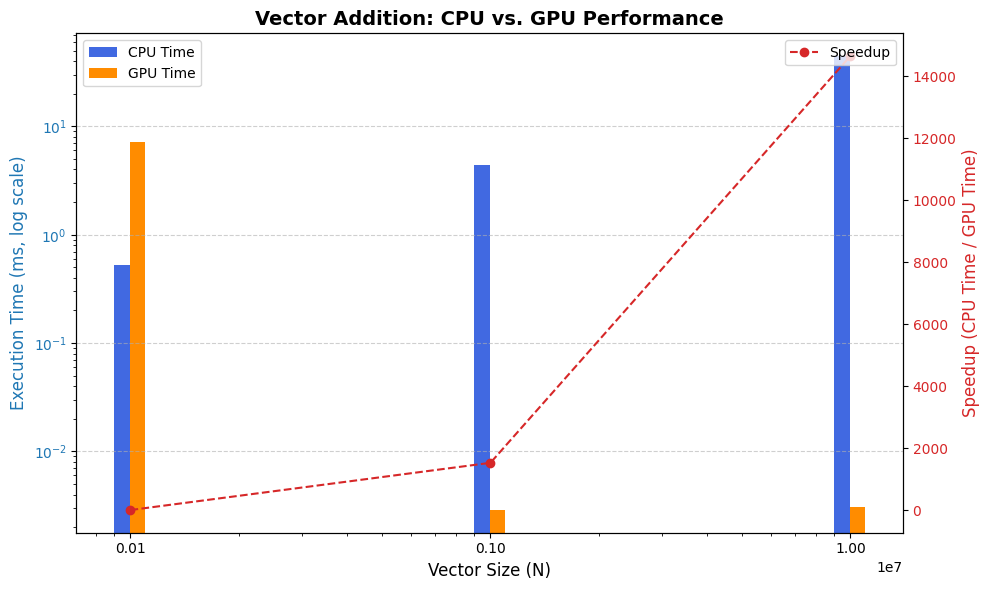

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# Step 1: Compile and run the CUDA code.
# The '!' captures the command's output into the 'cpp_output' variable.
cpp_output = !nvcc problem5.cu -o problem5 && ./problem5

# Step 2: Join the output lines into a single string.
csv_data = "\n".join(cpp_output)

print("--- Captured C++ Output ---")
print(csv_data)
print("---------------------------\n")

# Step 3: Use pandas to read the string data and plot.
# This part is the same as before, but now it's guaranteed to have the correct data.
df = pd.read_csv(io.StringIO(csv_data))

# [cite_start]Calculate speedup [cite: 73]
df['Speedup'] = df['CPU_Time_ms'] / df['GPU_Time_ms']

print("--- Vector Addition Performance Analysis ---")
print(df.round(2))
print("\n")

# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Vector Size (N)', fontsize=12)
ax1.set_ylabel('Execution Time (ms, log scale)', color=color, fontsize=12)
ax1.bar(df['Size'] - df['Size']*0.05, df['CPU_Time_ms'], width=df['Size']*0.1, color='royalblue', label='CPU Time')
ax1.bar(df['Size'] + df['Size']*0.05, df['GPU_Time_ms'], width=df['Size']*0.1, color='darkorange', label='GPU Time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks(df['Size'])
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax1.legend(loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.6)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Speedup (CPU Time / GPU Time)', color=color, fontsize=12)
ax2.plot(df['Size'], df['Speedup'], color=color, marker='o', linestyle='--', label='Speedup')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Vector Addition: CPU vs. GPU Performance', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

In [115]:
%%writefile problem6.cu
#include <iostream>
#include <vector>
#include <cstdlib>
#include <chrono>

// Kernel for matrix addition using a 2D grid of threads
__global__ void matrixAdd(float *A, float *B, float *C, int M, int N) {
    int row = blockIdx.y * blockDim.y + threadIdx.y;
    int col = blockIdx.x * blockDim.x + threadIdx.x;

    if (row < M && col < N) {
        int idx = row * N + col;
        C[idx] = A[idx] + B[idx]; // C[i][j] = A[i][j] + B[i][j]
    }
}

// Host function for CPU matrix addition
void matrixAddCPU(float *A, float *B, float *C, int M, int N) {
    for (int i = 0; i < M * N; ++i) {
        C[i] = A[i] + B[i];
    }
}

int main() {
    // Define matrix sizes to test
    const int sizes[] = {100, 500, 1000};
    std::cout << "Size,CPU_Time_ms,GPU_Time_ms" << std::endl;

    for (int n : sizes) {
        int M = n, N = n;
        size_t matrix_size = M * N * sizeof(float);

        float *h_A = new float[M * N];
        float *h_B = new float[M * N];
        float *h_C_cpu = new float[M * N];
        float *h_C_gpu = new float[M * N];

        // Initialize matrices with random values
        for (int i = 0; i < M * N; ++i) {
            h_A[i] = static_cast<float>(rand()) / RAND_MAX;
            h_B[i] = static_cast<float>(rand()) / RAND_MAX;
        }

        // --- CPU Execution ---
        auto start_cpu = std::chrono::high_resolution_clock::now();
        matrixAddCPU(h_A, h_B, h_C_cpu, M, N);
        auto stop_cpu = std::chrono::high_resolution_clock::now();
        std::chrono::duration<double, std::milli> cpu_time = stop_cpu - start_cpu;

        // --- GPU Execution ---
        float *d_A, *d_B, *d_C;
        cudaMalloc(&d_A, matrix_size);
        cudaMalloc(&d_B, matrix_size);
        cudaMalloc(&d_C, matrix_size);

        cudaEvent_t start_gpu, stop_gpu;
        cudaEventCreate(&start_gpu);
        cudaEventCreate(&stop_gpu);

        cudaMemcpy(d_A, h_A, matrix_size, cudaMemcpyHostToDevice);
        cudaMemcpy(d_B, h_B, matrix_size, cudaMemcpyHostToDevice);

        dim3 threadsPerBlock(16, 16);
        dim3 blocksPerGrid((N + threadsPerBlock.x - 1) / threadsPerBlock.x,
                           (M + threadsPerBlock.y - 1) / threadsPerBlock.y);

        cudaEventRecord(start_gpu);
        matrixAdd<<<blocksPerGrid, threadsPerBlock>>>(d_A, d_B, d_C, M, N);
        cudaEventRecord(stop_gpu);

        cudaMemcpy(h_C_gpu, d_C, matrix_size, cudaMemcpyDeviceToHost);

        cudaEventSynchronize(stop_gpu);
        float gpu_time = 0;
        cudaEventElapsedTime(&gpu_time, start_gpu, stop_gpu);

        std::cout << n << "x" << n << "," << cpu_time.count() << "," << gpu_time << std::endl;

        delete[] h_A;
        delete[] h_B;
        delete[] h_C_cpu;
        delete[] h_C_gpu;
        cudaFree(d_A);
        cudaFree(d_B);
        cudaFree(d_C);
        cudaEventDestroy(start_gpu);
        cudaEventDestroy(stop_gpu);
    }
    return 0;
}

Overwriting problem6.cu


In [116]:
!nvcc problem6.cu -o problem6 && ./problem6

Size,CPU_Time_ms,GPU_Time_ms
100x100,0.04115,7.44058
500x500,0.822733,0.0024
1000x1000,4.22462,0.0024


--- Captured C++ Output ---
Size,CPU_Time_ms,GPU_Time_ms
100x100,0.044093,7.50387
500x500,0.874233,0.002688
1000x1000,4.24869,0.0024

---------------------------

--- Matrix Addition Performance Analysis ---
        Size  CPU_Time_ms  GPU_Time_ms  Speedup
0    100x100         0.04          7.5     0.01
1    500x500         0.87          0.0   325.24
2  1000x1000         4.25          0.0  1770.29


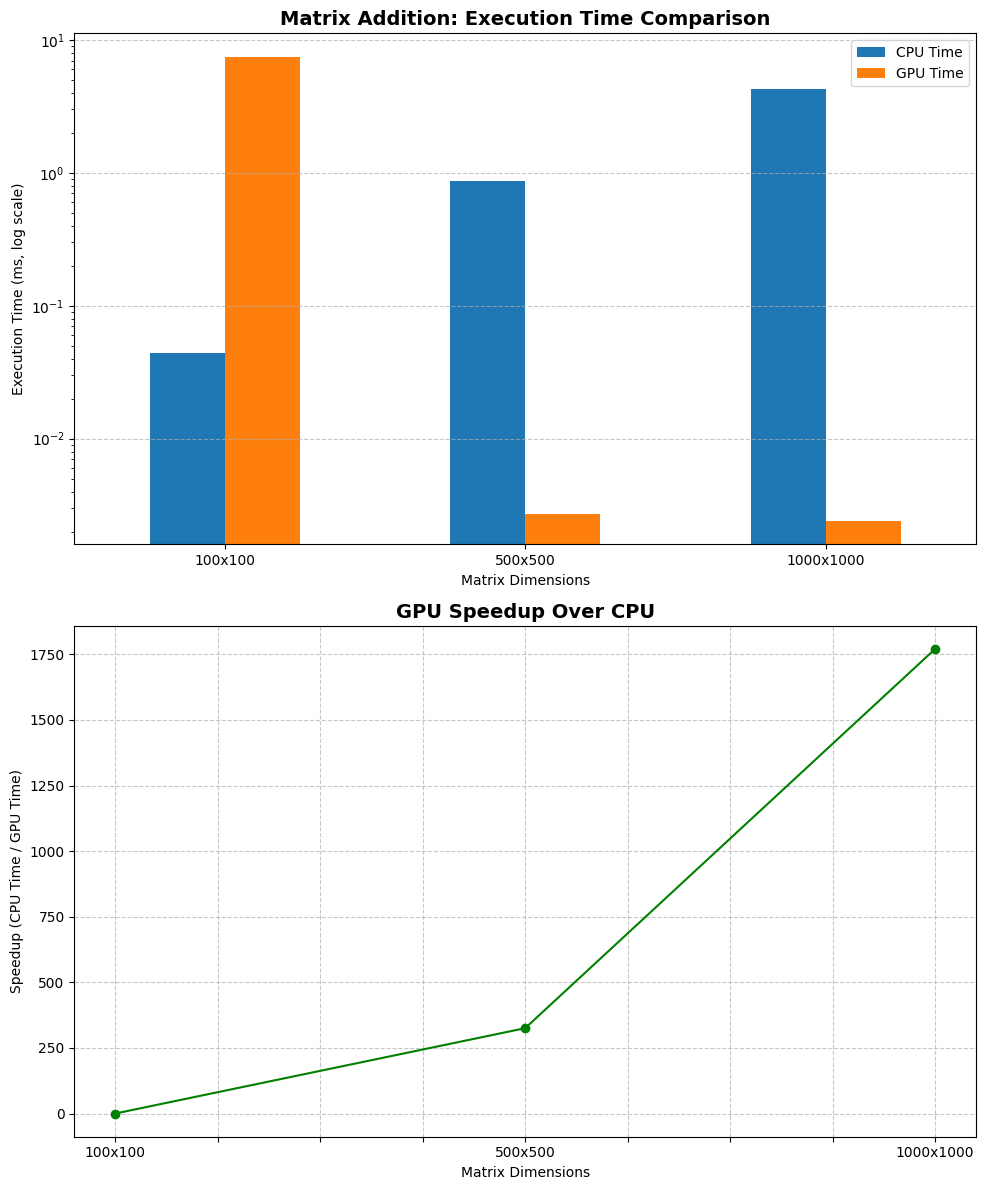

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import subprocess

# Compile the code. If compilation fails, print the error.
compile_result = subprocess.run(['nvcc', 'problem6.cu', '-o', 'problem6'], capture_output=True, text=True)
if compile_result.returncode != 0:
    print("--- COMPILATION FAILED ---")
    print(compile_result.stderr)
else:
    # If compilation succeeds, run the executable and capture its output.
    run_result = subprocess.run(['./problem6'], capture_output=True, text=True)
    csv_data = run_result.stdout

    print("--- Captured C++ Output ---")
    print(csv_data)
    print("---------------------------\n")

    # Read the captured data with pandas and plot
    df = pd.read_csv(io.StringIO(csv_data))
    df['Speedup'] = df['CPU_Time_ms'] / df['GPU_Time_ms']
    print("--- Matrix Addition Performance Analysis ---")
    print(df.round(2))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    df.plot(x='Size', y=['CPU_Time_ms', 'GPU_Time_ms'], kind='bar', ax=ax1, logy=True, rot=0)
    ax1.set_title('Matrix Addition: Execution Time Comparison', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Execution Time (ms, log scale)'); ax1.set_xlabel('Matrix Dimensions')
    ax1.grid(axis='y', linestyle='--', alpha=0.7); ax1.legend(['CPU Time', 'GPU Time'])

    df.plot(x='Size', y='Speedup', kind='line', marker='o', color='green', ax=ax2, legend=False)
    ax2.set_title('GPU Speedup Over CPU', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Speedup (CPU Time / GPU Time)'); ax2.set_xlabel('Matrix Dimensions')
    ax2.grid(linestyle='--', alpha=0.7)

    plt.tight_layout(); plt.show()

In [118]:
%%writefile problem7.cu
#include <iostream>
#include <vector>
#include <cstdlib>
#include <chrono>

// Kernel for dot product using shared memory reduction
__global__ void dotProduct(float *A, float *B, float *result, int N) {
    // Shared memory for partial sums within a block
    extern __shared__ float cache[];

    int tid = threadIdx.x;
    int i = blockIdx.x * blockDim.x + tid;

    // Each thread computes one product and stores it in shared memory
    if (i < N) {
        cache[tid] = A[i] * B[i];
    } else {
        cache[tid] = 0;
    }
    __syncthreads(); // Wait for all threads in the block to finish

    // Perform parallel reduction in shared memory.
    // The loop halves the number of active threads in each step.
    for (int s = blockDim.x / 2; s > 0; s >>= 1) {
        if (tid < s) {
            cache[tid] += cache[tid + s];
        }
        __syncthreads();
    }

    // The first thread in the block adds its partial sum to the global result
    // using an atomic operation to prevent race conditions between blocks.
    if (tid == 0) {
        atomicAdd(result, cache[0]);
    }
}

// Host function for CPU dot product
float dotProductCPU(float *A, float *B, int N) {
    float sum = 0.0f;
    for (int i = 0; i < N; ++i) {
        sum += A[i] * B[i];
    }
    return sum;
}

int main() {
    // Define vector sizes to test
    const int sizes[] = {100000, 1000000, 10000000};
    std::cout << "Size,CPU_Time_ms,GPU_Time_ms" << std::endl;

    for (int N : sizes) {
        size_t vec_size = N * sizeof(float);
        float *h_A = new float[N];
        float *h_B = new float[N];
        float h_result_gpu = 0.0f; // Initial result must be 0

        // Initialize vectors with random values
        for (int i = 0; i < N; ++i) {
            h_A[i] = static_cast<float>(rand()) / RAND_MAX;
            h_B[i] = static_cast<float>(rand()) / RAND_MAX;
        }

        // --- CPU Execution ---
        auto start_cpu = std::chrono::high_resolution_clock::now();
        dotProductCPU(h_A, h_B, N);
        auto stop_cpu = std::chrono::high_resolution_clock::now();
        std::chrono::duration<double, std::milli> cpu_time = stop_cpu - start_cpu;

        // --- GPU Execution ---
        float *d_A, *d_B, *d_result;
        cudaMalloc(&d_A, vec_size);
        cudaMalloc(&d_B, vec_size);
        cudaMalloc(&d_result, sizeof(float));

        cudaEvent_t start_gpu, stop_gpu;
        cudaEventCreate(&start_gpu);
        cudaEventCreate(&stop_gpu);

        cudaMemcpy(d_A, h_A, vec_size, cudaMemcpyHostToDevice);
        cudaMemcpy(d_B, h_B, vec_size, cudaMemcpyHostToDevice);
        // Important: Initialize the result on the device to zero
        cudaMemcpy(d_result, &h_result_gpu, sizeof(float), cudaMemcpyHostToDevice);

        int threadsPerBlock = 256;
        int blocksPerGrid = (N + threadsPerBlock - 1) / threadsPerBlock;
        size_t sharedMemSize = threadsPerBlock * sizeof(float);

        cudaEventRecord(start_gpu);
        // Launch kernel with dynamic shared memory
        dotProduct<<<blocksPerGrid, threadsPerBlock, sharedMemSize>>>(d_A, d_B, d_result, N);
        cudaEventRecord(stop_gpu);

        cudaMemcpy(&h_result_gpu, d_result, sizeof(float), cudaMemcpyDeviceToHost);

        cudaEventSynchronize(stop_gpu);
        float gpu_time = 0;
        cudaEventElapsedTime(&gpu_time, start_gpu, stop_gpu);

        std::cout << N << "," << cpu_time.count() << "," << gpu_time << std::endl;

        delete[] h_A;
        delete[] h_B;
        cudaFree(d_A);
        cudaFree(d_B);
        cudaFree(d_result);
        cudaEventDestroy(start_gpu);
        cudaEventDestroy(stop_gpu);
    }
    return 0;
}

Overwriting problem7.cu


In [119]:
!nvcc problem7.cu -o problem7 && ./problem7

Size,CPU_Time_ms,GPU_Time_ms
100000,0.285667,7.36067
1000000,3.23757,0.004128
10000000,29.0098,0.006688


--- Captured C++ Output ---
Size,CPU_Time_ms,GPU_Time_ms
100000,0.284418,13.0448
1000000,3.40619,0.004512
10000000,30.9696,0.006144

---------------------------

--- Dot Product Performance Analysis ---
       Size  CPU_Time_ms  GPU_Time_ms  Speedup
0    100000         0.28        13.04     0.02
1   1000000         3.41         0.00   754.92
2  10000000        30.97         0.01  5040.62


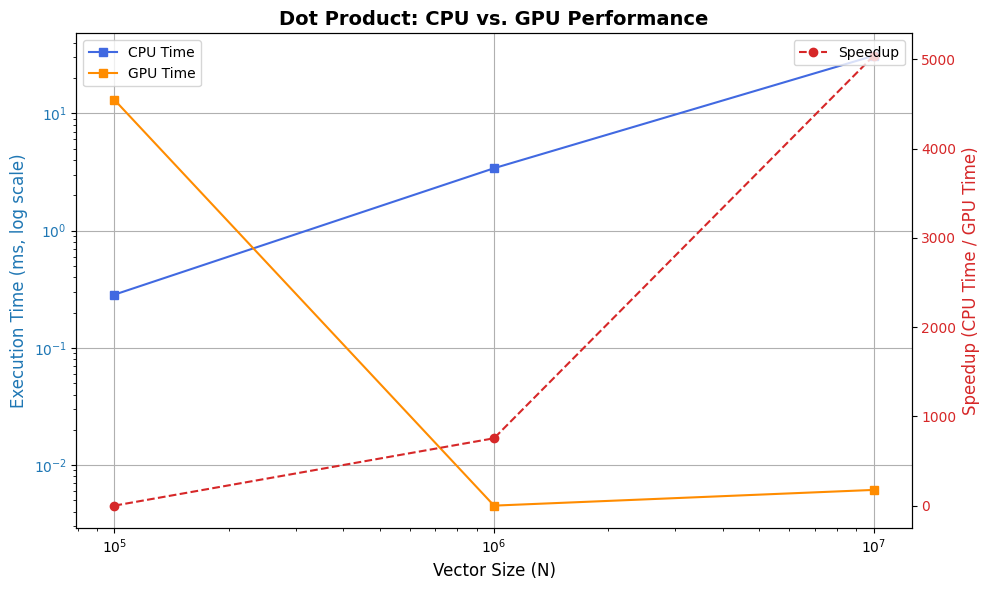

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import subprocess

# Compile the code. If compilation fails, print the error.
compile_result = subprocess.run(['nvcc', 'problem7.cu', '-o', 'problem7'], capture_output=True, text=True)
if compile_result.returncode != 0:
    print("--- COMPILATION FAILED ---")
    print(compile_result.stderr)
else:
    # If compilation succeeds, run the executable and capture its output.
    run_result = subprocess.run(['./problem7'], capture_output=True, text=True)
    csv_data = run_result.stdout

    print("--- Captured C++ Output ---")
    print(csv_data)
    print("---------------------------\n")

    # Read the captured data with pandas and plot
    df = pd.read_csv(io.StringIO(csv_data))
    df['Speedup'] = df['CPU_Time_ms'] / df['GPU_Time_ms']
    print("--- Dot Product Performance Analysis ---")
    print(df.round(2))

    fig, ax1 = plt.subplots(figsize=(10, 6))
    color = 'tab:blue'
    ax1.set_xlabel('Vector Size (N)', fontsize=12)
    ax1.set_ylabel('Execution Time (ms, log scale)', color=color, fontsize=12)
    ax1.plot(df['Size'], df['CPU_Time_ms'], color='royalblue', marker='s', label='CPU Time')
    ax1.plot(df['Size'], df['GPU_Time_ms'], color='darkorange', marker='s', label='GPU Time')
    ax1.tick_params(axis='y', labelcolor=color); ax1.set_xscale('log'); ax1.set_yscale('log')
    ax1.legend(loc='upper left'); ax1.grid(True)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Speedup (CPU Time / GPU Time)', color=color, fontsize=12)
    ax2.plot(df['Size'], df['Speedup'], color=color, marker='o', linestyle='--', label='Speedup')
    ax2.tick_params(axis='y', labelcolor=color); ax2.legend(loc='upper right')

    plt.title('Dot Product: CPU vs. GPU Performance', fontsize=14, fontweight='bold')
    fig.tight_layout(); plt.show()

In [121]:
%%writefile problem8.cu
#include <iostream>
#include <vector>
#include <cstdlib>
#include <chrono>

// Naive Matrix Multiplication Kernel
__global__ void matrixMul(float *A, float *B, float *C, int M, int N, int P) {
    int row = blockIdx.y * blockDim.y + threadIdx.y;
    int col = blockIdx.x * blockDim.x + threadIdx.x;

    if (row < M && col < P) {
        float sum = 0.0f;
        for (int k = 0; k < N; ++k) {
            sum += A[row * N + k] * B[k * P + col];
        }
        C[row * P + col] = sum;
    }
}

// Host function for CPU matrix multiplication
void matrixMulCPU(float *A, float *B, float *C, int M, int N, int P) {
    for (int row = 0; row < M; ++row) {
        for (int col = 0; col < P; ++col) {
            float sum = 0.0f;
            for (int k = 0; k < N; ++k) {
                sum += A[row * N + k] * B[k * P + col];
            }
            C[row * P + col] = sum;
        }
    }
}

int main() {
    // Define matrix sizes to test
    const int sizes[] = {100, 500, 1000};
    std::cout << "Size,CPU_Time_ms,GPU_Time_ms" << std::endl;

    for (int n : sizes) {
        int M = n, N = n, P = n;
        size_t sizeA = M * N * sizeof(float);
        size_t sizeB = N * P * sizeof(float);
        size_t sizeC = M * P * sizeof(float);

        float *h_A = new float[M * N];
        float *h_B = new float[N * P];
        float *h_C_cpu = new float[M * P];
        float *h_C_gpu = new float[M * P];

        // Initialize matrices with random values
        for (int i = 0; i < M * N; ++i) h_A[i] = static_cast<float>(rand()) / RAND_MAX;
        for (int i = 0; i < N * P; ++i) h_B[i] = static_cast<float>(rand()) / RAND_MAX;

        // --- CPU Execution ---
        auto start_cpu = std::chrono::high_resolution_clock::now();
        matrixMulCPU(h_A, h_B, h_C_cpu, M, N, P);
        auto stop_cpu = std::chrono::high_resolution_clock::now();
        std::chrono::duration<double, std::milli> cpu_time = stop_cpu - start_cpu;

        // --- GPU Execution ---
        float *d_A, *d_B, *d_C;
        cudaMalloc(&d_A, sizeA);
        cudaMalloc(&d_B, sizeB);
        cudaMalloc(&d_C, sizeC);

        cudaEvent_t start_gpu, stop_gpu;
        cudaEventCreate(&start_gpu);
        cudaEventCreate(&stop_gpu);

        cudaMemcpy(d_A, h_A, sizeA, cudaMemcpyHostToDevice);
        cudaMemcpy(d_B, h_B, sizeB, cudaMemcpyHostToDevice);

        dim3 threadsPerBlock(16, 16);
        dim3 blocksPerGrid((P + threadsPerBlock.x - 1) / threadsPerBlock.x,
                           (M + threadsPerBlock.y - 1) / threadsPerBlock.y);

        cudaEventRecord(start_gpu);
        matrixMul<<<blocksPerGrid, threadsPerBlock>>>(d_A, d_B, d_C, M, N, P);
        cudaEventRecord(stop_gpu);

        cudaMemcpy(h_C_gpu, d_C, sizeC, cudaMemcpyDeviceToHost);

        cudaEventSynchronize(stop_gpu);
        float gpu_time = 0;
        cudaEventElapsedTime(&gpu_time, start_gpu, stop_gpu);

        std::cout << n << "x" << n << "," << cpu_time.count() << "," << gpu_time << std::endl;

        delete[] h_A;
        delete[] h_B;
        delete[] h_C_cpu;
        delete[] h_C_gpu;
        cudaFree(d_A);
        cudaFree(d_B);
        cudaFree(d_C);
        cudaEventDestroy(start_gpu);
        cudaEventDestroy(stop_gpu);
    }
    return 0;
}

Overwriting problem8.cu


In [122]:
!nvcc problem8.cu -o problem8 && ./problem8

Size,CPU_Time_ms,GPU_Time_ms
100x100,4.13217,10.5418
500x500,471.345,0.002432
1000x1000,4761.47,0.002464


--- Captured C++ Output ---
Size,CPU_Time_ms,GPU_Time_ms
100x100,3.08176,10.977
500x500,457.417,0.002464
1000x1000,4936.23,0.002464

---------------------------

--- Matrix Multiplication Performance Analysis ---
        Size  CPU_Time_ms  GPU_Time_ms     Speedup
0    100x100         3.08        10.98        0.28
1    500x500       457.42         0.00   185640.02
2  1000x1000      4936.23         0.00  2003340.10


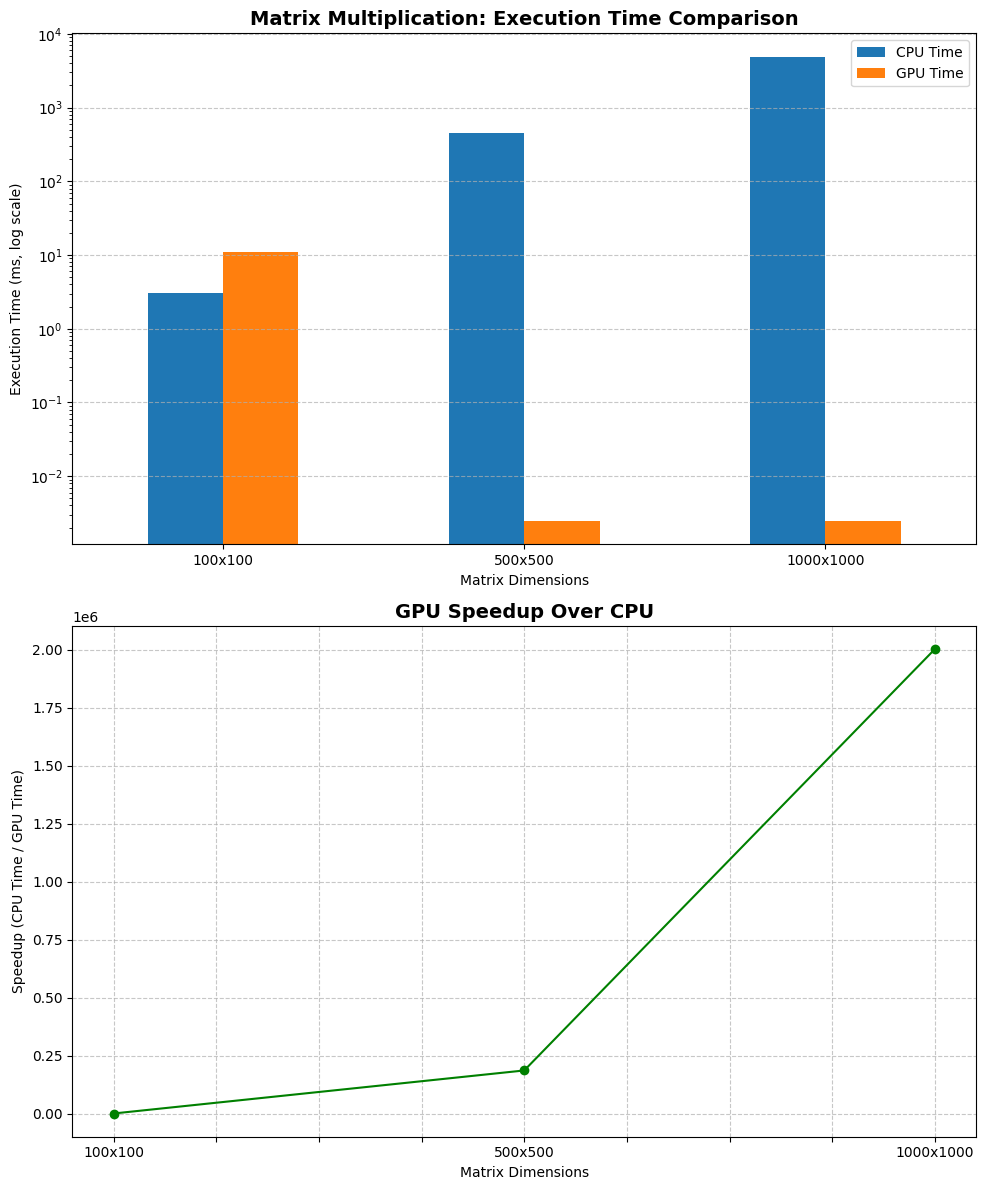

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import subprocess

# Compile the code. If compilation fails, print the error.
compile_result = subprocess.run(['nvcc', 'problem8.cu', '-o', 'problem8'], capture_output=True, text=True)
if compile_result.returncode != 0:
    print("--- COMPILATION FAILED ---")
    print(compile_result.stderr)
else:
    # If compilation succeeds, run the executable and capture its output.
    run_result = subprocess.run(['./problem8'], capture_output=True, text=True)
    csv_data = run_result.stdout

    print("--- Captured C++ Output ---")
    print(csv_data)
    print("---------------------------\n")

    # Read the captured data with pandas and plot
    df = pd.read_csv(io.StringIO(csv_data))
    df['Speedup'] = df['CPU_Time_ms'] / df['GPU_Time_ms']
    print("--- Matrix Multiplication Performance Analysis ---")
    print(df.round(2))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    df.plot(x='Size', y=['CPU_Time_ms', 'GPU_Time_ms'], kind='bar', ax=ax1, logy=True, rot=0)
    ax1.set_title('Matrix Multiplication: Execution Time Comparison', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Execution Time (ms, log scale)'); ax1.set_xlabel('Matrix Dimensions')
    ax1.grid(axis='y', linestyle='--', alpha=0.7); ax1.legend(['CPU Time', 'GPU Time'])

    df.plot(x='Size', y='Speedup', kind='line', marker='o', color='green', ax=ax2, legend=False)
    ax2.set_title('GPU Speedup Over CPU', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Speedup (CPU Time / GPU Time)'); ax2.set_xlabel('Matrix Dimensions')
    ax2.grid(linestyle='--', alpha=0.7)

    plt.tight_layout(); plt.show()